## Eclipse Obscuration Calculator
Inspired by https://gist.github.com/eteq/f879c2fe69d75d1c5a9e007b0adce30d and http://rhodesmill.org/pyephem/tutorial.html

Note that astropy is *much* slower than PyEphem, but gives you more correct results. Results from this have been spot-checked against http://xjubier.free.fr/en/site_pages/solar_eclipses/TSE_2017_GoogleMapFull.html.

In [1]:
%pylab inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime
import eclipse_calc

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set Lat/Lon to Moors Resort and Marina in Gilbertsville, KY
lat =  36.91833
lon = -88.21953

In [3]:
# Create a vector of times to evaluate
sTime = datetime.datetime(2017,8,21,16,0)
eTime = datetime.datetime(2017,8,21,20,0)
dt    = datetime.timedelta(minutes=5)

times = [sTime]
while times[-1] < eTime:
    times.append(times[-1]+dt)

In [4]:
# Calculate Obscuration Values
obsc  = eclipse_calc.calculate_obscuration(times,lat,lon)

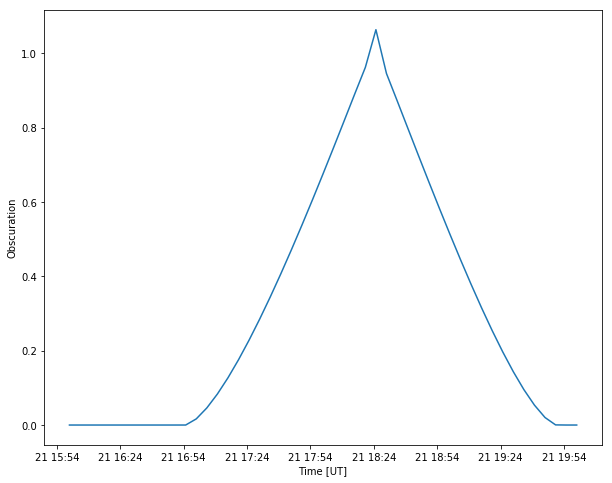

In [5]:
# Plot results
fig      = plt.figure(figsize=(10,8))
ax       = fig.add_subplot(111)
ax.plot(times,obsc)
ax.set_xlabel('Time [UT]')
ax.set_ylabel('Obscuration')
plt.show()